In [ ]:
 !mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:05<00:00, 160MB/s]
100% 1.06G/1.06G [00:05<00:00, 199MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
#generators
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalise

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train = train.map(process)
validation = validation.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'valid', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train, epochs = 4, validation_data = validation)
history

Epoch 1/4
625/625 [==============================] - 77s 107ms/step - loss: 1.2962 - accuracy: 0.6009 - val_loss: 0.6344 - val_accuracy: 0.6276
Epoch 2/4
625/625 [==============================] - 68s 108ms/step - loss: 0.5585 - accuracy: 0.7143 - val_loss: 0.8977 - val_accuracy: 0.5322
Epoch 3/4
625/625 [==============================] - 65s 104ms/step - loss: 0.4916 - accuracy: 0.7624 - val_loss: 0.4547 - val_accuracy: 0.7880
Epoch 4/4
625/625 [==============================] - 67s 107ms/step - loss: 0.4217 - accuracy: 0.8077 - val_loss: 0.4461 - val_accuracy: 0.7914


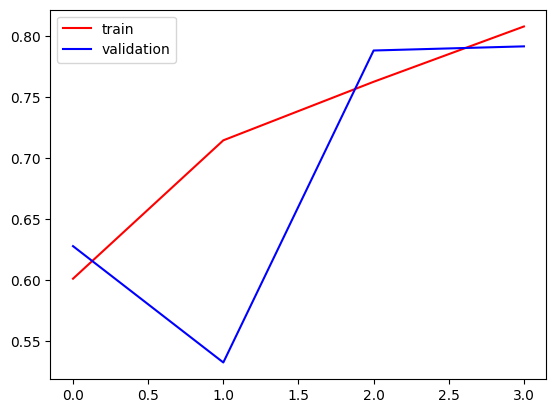

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

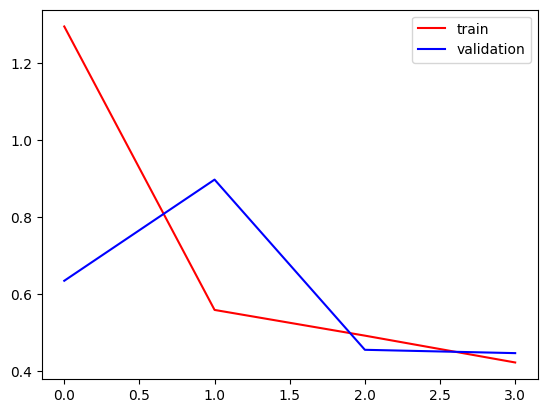

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog-5357794_640.jpg')

In [ ]:
test_img = cv2.resize(test_img, (256,256))

array([[[46, 59, 23],
        [45, 60, 24],
        [45, 62, 25],
        ...,
        [58, 78, 56],
        [60, 80, 58],
        [60, 79, 57]],

       [[45, 59, 23],
        [44, 59, 23],
        [44, 61, 24],
        ...,
        [56, 75, 50],
        [56, 75, 50],
        [54, 73, 48]],

       [[44, 58, 22],
        [43, 58, 22],
        [42, 59, 22],
        ...,
        [50, 68, 40],
        [50, 68, 41],
        [49, 67, 39]],

       ...,

       [[31, 83, 74],
        [22, 71, 54],
        [24, 70, 46],
        ...,
        [31, 34, 26],
        [18, 20, 14],
        [23, 23, 17]],

       [[38, 92, 86],
        [23, 77, 61],
        [23, 73, 49],
        ...,
        [16, 18, 12],
        [15, 17,  8],
        [18, 19, 10]],

       [[38, 95, 87],
        [31, 86, 72],
        [28, 81, 59],
        ...,
        [12, 15,  8],
        [14, 15,  6],
        [19, 19,  9]]], dtype=uint8)
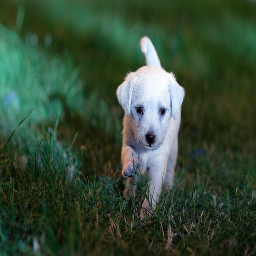

In [ ]:
test_img

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)